# Visualising the Gender Gap in College Majors


Today I'm going to look at creating visualisations which communicate the historical narrative of the gender gap in different fields of study in the US.

I'll use the already cleaned data set described below, and I'm going to take the opportunity to practice some techniques to eliminate [chartjunk](https://en.wikipedia.org/wiki/Chartjunk) and maximise the [data-ink ratio](https://infovis-wiki.net/wiki/Data-Ink_Ratio).  I want these visuals to be communicative and complete, not requiring any ancillary data to be understood.

All the better to see you with my dear!

### Context
The [National Center for Education Statistics](https://nces.ed.gov/programs/digest/current_tables.asp) in the US releases a data set annually containing the percentage of bachelor's degrees granted to women since 1970. The data set is broken up into 17 categories of degrees, with each column as a separate category.

[Randal Olson](http://www.randalolson.com/2014/06/14/percentage-of-bachelors-degrees-conferred-to-women-by-major-1970-2012/), a data scientist from the University of Pennsylvania, has cleaned the data set for years 1970 to 2012 and made it available on his personal website. 

Gender parity is a topic close to my own heart, and we still have a long way to go in understanding it or in some instances even [agreeing that it exists](https://www.smartcompany.com.au/business-advice/politics/frydenberg-pay-gap-closed/), let alone bridging it.

Right, let's use Randal's [cleaned data](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv) to see some historical differences between the genders regarding their chosen fields of study in the US.

For the purposes of this analysis I'll be treating gender as a binary construct only.

## Load the Data
Let's load our data and do some initial exploration of the data set.

It is not large and I can easily display it in its entirety.

In [1]:
import pandas as pd

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,23.9,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.7,72.456395,6.8,62.723067,74.3,80.5,41.1,21.3,59.0,69.3,40.5
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.1,73.192821,8.4,63.619122,74.3,81.9,41.6,22.5,61.3,71.5,41.8
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.2,73.821142,9.4,65.088390,74.2,82.3,42.3,23.7,63.3,73.3,43.6


The data has been cleaned already. I do a quick check to confirm the data is complete and in a usable format.

There are no missing values, and the percentages are all of data type `float`, which is perfect for my purposes.

In [2]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

## The Gender Gap in STEM

Let's first take a look at the historical narrative of the gender gap in STEM fields (Science, Technology, Engineering and Maths).

As the data set deals with percentages of women who completed Bachelor degrees each field, I can easily impute the corresponding data for men by subtracting the known percentage values from 100.

I will display the comparison of degrees awarded in each field by gender for the 6 STEM subjects in one figure.

I aim to use my ink judiciously: 
- using a colour palette suitable for colourblind readers
- removing plot spines
- removing plot tick parameters
- doing away with labels and legends
- using annotations, sparingly

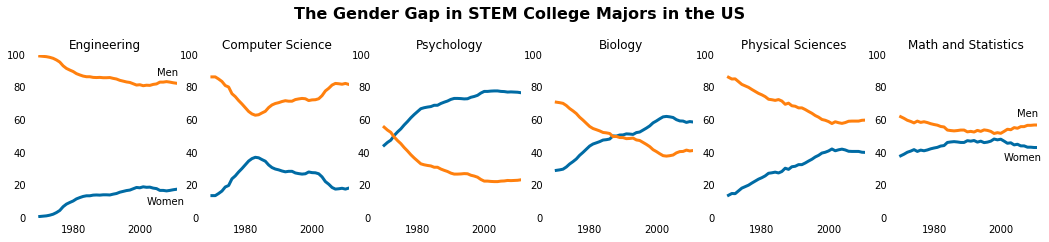

In [3]:
# Import
%matplotlib inline
import matplotlib.pyplot as plt

# Set our RBG colour palette
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# List our STEM fields
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# Initialise our figure
fig = plt.figure(figsize=(18, 3))
fig.suptitle('The Gender Gap in STEM College Majors in the US', y=1.1, fontsize='16', fontweight='bold')

# Iterate over our STEM cats, plotting our subplots
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    
    # Plot percentages for men
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # Set axis limits and title
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])

    # Remove spines
    for key, value in ax.spines.items():
        value.set_visible(False)
    
    # Remove tick params
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    # Annotate
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

# Export our figure
plt.savefig('gender_stem_degrees.png')        
plt.show()

Interesting to note:

- Men are highly over-represented compared to women in the fields of `Engineering` and `Computer Science`  

- For the `Physical Sciences` and `Math and Statistics`, while men have historically been over-represented, we can see that the gap has narrowed over time to something potentially approaching parity  

- It is especially interesting to me to note that in the more 'human-centred' fields of `Psychology` and `Biology`, women take the lead, and are especially significantly over-represented in `Psychology`   

It would be an interesting project to investigate further the cultural shifts and evolving societal norms that influenced these transitions over time in all fields.

## Gender Gap across all Fields

Let's now do the same for all fields of education in our data set. 

I want to visualise how fields in STEM compare to fields in the Liberal Arts (e.g. languages, communications, social sciences, arts) and other fields.

To this end, this time I will group our degree fields into the three categories just mentioned (STEM, Liberal Arts, other), and display them column by column.

I will again do this in one figure, with a subplot for each individual field.

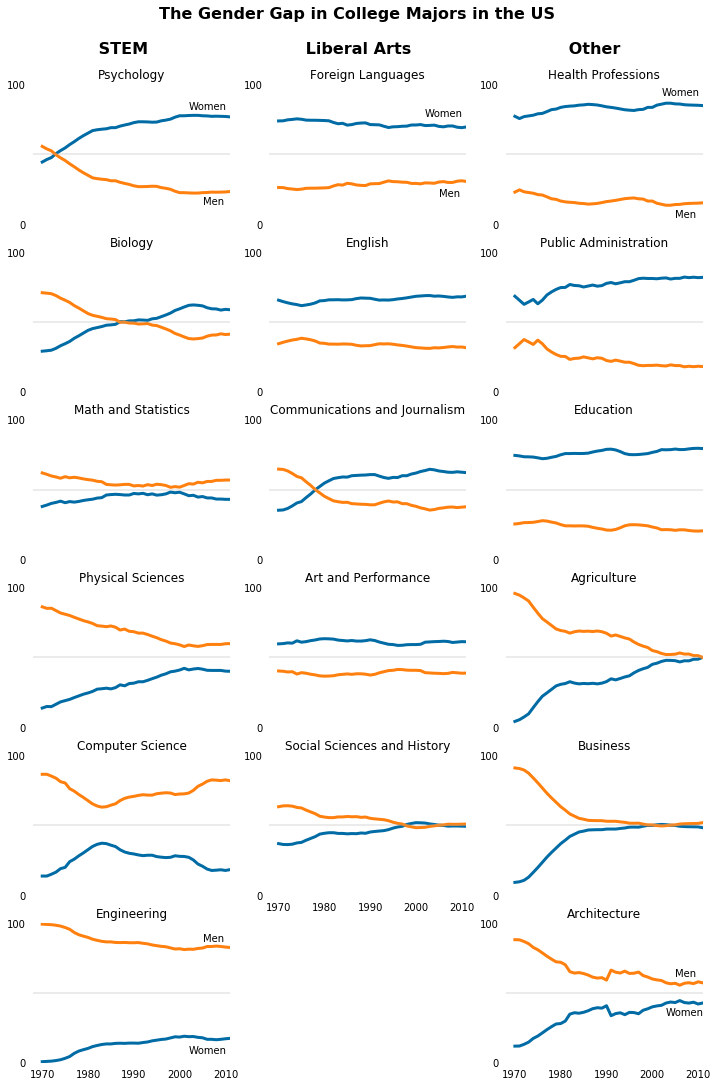

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set colourblind colour palette
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# List our 3 sets of degree categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# Create our figure
fig = plt.figure(figsize=(12, 18))
fig.suptitle('The Gender Gap in College Majors in the US\n\n STEM                            Liberal Arts                            Other',
             fontsize=16, fontweight='bold', y=.94)

# Iterate over our STEM cats, plotting our subplots in the correct location
for i in range(0,18,3):
    ax = fig.add_subplot(6,3,i+1)
    r = int(i/3)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[r]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[r]], c=cb_orange, label='Men', linewidth=3)
    
    # Set axis limits, yticks, titles
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(stem_cats[r])
    
    # Remove spines
    for key, value in ax.spines.items():
        value.set_visible(False)
    
    # Disable the tick label bottom for all charts
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)

    
    # Add a horizontal line at the half-way point
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if i == 0:
        ax.text(2002, 82, 'Women')
        ax.text(2005, 14, 'Men')
    elif i == 15:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 7, 'Women')


# Enable tick lables on the bottom chart
ax.tick_params(labelbottom=True)


# Iterate over our LIBERAL ARTS cats, plotting our subplots in the correct location
for i in range(1, 14, 3):
    ax = fig.add_subplot(6,3,i+1)
    r = int((i-1)/3)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[r]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[r]], c=cb_orange, label='Men', linewidth=3)
    
    # Set axis limits, yticks, titles
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(lib_arts_cats[r])
    
    # Remove spines
    for key, value in ax.spines.items():
        value.set_visible(False)
    
    # Disable the tick label bottom for all charts
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    # Add a horizontal line at the half-way point
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if i == 1:
        ax.text(2002, 77, 'Women')
        ax.text(2005, 20, 'Men')

        
# Enable tick lables on bottom chart
ax.tick_params(labelbottom=True)

# Iterate over our OTHER cats, plotting our subplots in the correct location
for i in range(2, 18, 3):
    ax = fig.add_subplot(6,3,i+1)
    r = int((i-2)/3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[r]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[r]], c=cb_orange, label='Men', linewidth=3)
    
    # Set axis limits, yticks, titles
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_yticks([0,100])
    ax.set_title(other_cats[r])
    
    # Remove spines
    for key, value in ax.spines.items():
        value.set_visible(False)
    
    # Disable the tick label bottom for all charts
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    # Add a horizontal line at the half-way point
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if i == 2:
        ax.text(2002, 92, 'Women')
        ax.text(2005, 5, 'Men')
    elif i == 17:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 34, 'Women')
        
# Enable tick lables on bottom chart
ax.tick_params(labelbottom=True)

# Export our figure
plt.savefig('gender_degrees.png')
plt.show()

# Conclusion

In this project I created visualisations to communicate the historical narrative of the gender gap in different fields of study.

I also practiced some techniques to remove chartjunk and maximise the data-ink ratio, with the aim of having these visuals work effectively as standalone artifacts.

It's quite interesting to see how the gaps have trended over time in different fields, and in my opinion, even more so to notice my responses to the results, which raise all sorts of interesting questions about my own conditioning and biases.

What are our biases when we think of certain fields and professions? Who do we picture more in these roles? What are the attributes of these fields and roles that go towards us unconsciously considering them more masculine or feminine? What were the events which brought about the changes in mindsets and behaviours and influenced all these transitions over time?

Would you have predicted the results panned out the way they did?